# Housing Prices - Univariate Analyses

In [83]:
import pandas as pd

df = pd.read_csv('https://www.ishelp.info/data/housing_full.csv')
df = df.drop(columns=['Id'])
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [2]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique','Dtype','Numeric','Mean','Mode','Min','25%',
                                     'Median','75%','Max','std','skew','kurt' ])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtype,
                                  pd.api.types.is_numeric_dtype(df[col]),df[col].mean(),df[col].mode().values[0],
                                  df[col].min(),df[col].quantile(.25),df[col].median(),df[col].quantile(0.75),
                                  df[col].max(),df[col].std(),df[col].skew(),df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtype,
                                  pd.api.types.is_numeric_dtype(df[col]),'',df[col].mode().values[0],
                                  '','','','','','','','']
    return output_df

In [3]:
unistats(df)

Count Missing Unique    Dtype Numeric     Mean    Mode    Min  \
MSSubClass     1460       0     15    int64    True  56.8973      20     20   
MSZoning       1460       0      5   object   False               RL          
LotFrontage    1201     259    110  float64    True    70.05      60     21   
LotArea        1460       0   1073    int64    True  10516.8    7200   1300   
Street         1460       0      2   object   False             Pave          
...             ...     ...    ...      ...     ...      ...     ...    ...   
MoSold         1460       0     12    int64    True  6.32192       6      1   
YrSold         1460       0      5    int64    True  2007.82    2009   2006   
SaleType       1460       0      9   object   False               WD          
SaleCondition  1460       0      6   object   False           Normal          
SalePrice      1460       0    663    int64    True   180921  140000  34900   

                  25%  Median      75%     Max      std       skew      kurt  
MSSubClass         20      50       70     190  42.3006    1.40766   1.58019  
MSZoning                                                                      
LotFrontage        59      69       80     313  24.2848    2.16357   17.4529  
LotArea        7553.5  9478.5  11601.5  215245  9981.26    12.2077   203.243  
Street                                                                        
...               ...     ...      ...     ...      ...        ...       ...  
MoSold              5       6        8      12  2.70363   0.212053 -0.404109  
YrSold           2007    2008     2009    2010   1.3281  0.0962685   -1.1906  
SaleType                                                                      
SaleCondition                                                                 
SalePrice      129975  163000   214000  755000  79442.5    1.88288   6.53628  

[80 rows x 15 columns]

# Bivariate Analysis

## Bivariate: Numeric to numeric: Correlation
## Bivariate: Numeric to categorical: one way ANOVA(3+groups) or t-test(2 groups)
## Bivariate: Categorical to Categorical: Chi square

In [4]:
def anova(df, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)

In [5]:
def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    # create an empty dataframe to store output
    output_df = pd.DataFrame(columns=['Stat', '+/-', 'Effect size', 'p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(df[col]):# only calculate r, p -value for the numeric columns
                    r, p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = ['r', np.sign(r), abs(round(r,6)), round(p,6)]
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] = ['F', '', round(F, 6), round(p, 6)]
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, np.nan]
    return output_df.sort_values(by=['Effect size', 'Stat'], ascending=[False, False])

In [6]:
bivstats(df, 'SalePrice')

Stat  +/-  Effect size  p-value
ExterQual      F        443.334831      0.0
KitchenQual    F        407.806352      0.0
Foundation     F        100.253851      0.0
CentralAir     F         98.305344      0.0
HeatingQC      F         88.394462      0.0
...          ...  ...          ...      ...
GarageQual   NaN  NaN          NaN      NaN
GarageCond   NaN  NaN          NaN      NaN
PoolQC       NaN  NaN          NaN      NaN
Fence        NaN  NaN          NaN      NaN
MiscFeature  NaN  NaN          NaN      NaN

[79 rows x 4 columns]

# Bivariate Visualization

In [7]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'TotalSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wood

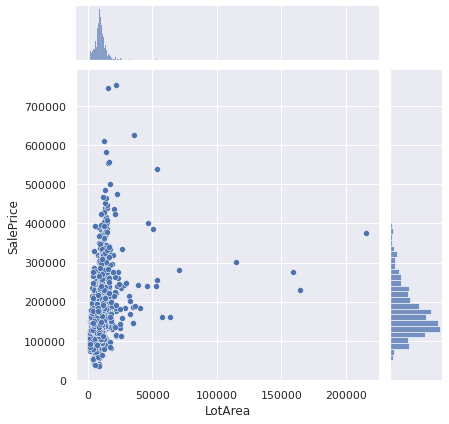

In [8]:
import seaborn as sns

sns.set(color_codes=True)
sns.jointplot(x='LotArea', y='SalePrice',data=df)

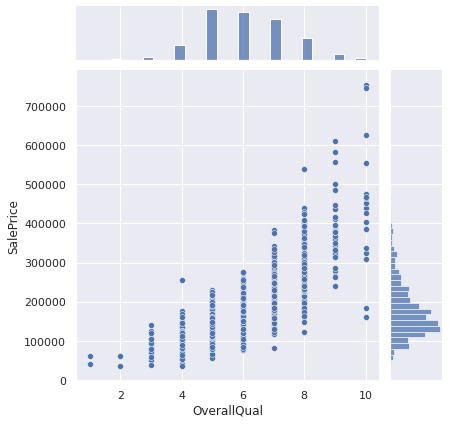

In [9]:
sns.jointplot(x='OverallQual', y='SalePrice',data=df)

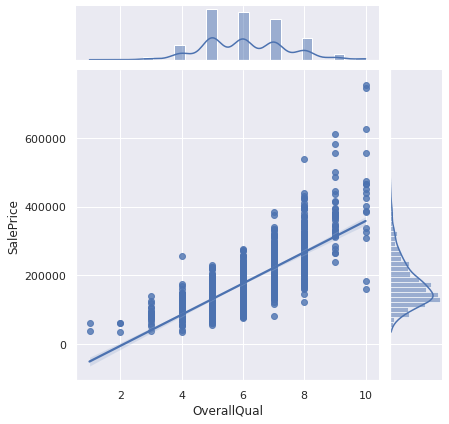

In [10]:
sns.jointplot(x='OverallQual', y='SalePrice',data=df, kind='reg')

In [11]:
def scatter(feature, label):
    import seaborn as sns
    from scipy import stats
    import matplotlib.pyplot as plt
    import pandas as pd
    
    # calculate the regression line
    m, b, r, p, err = stats.linregress(feature, label)
    
    textstr = 'y   = ' + str(round(m,6)) + 'x + ' + str(round(b,6)) + '\n'
    textstr += 'r2 = ' + str(round(r**2, 6)) + '\n'
    textstr += 'p  = ' + str(round(p, 6)) + '\n'
    textstr += str(feature.name) + 'skew = ' + str(round(feature.skew(), 6)) + '\n'
    textstr += str(label.name) + ' skew = ' + str(round(label.skew(), 6))
    
    sns.set(color_codes=True)
    ax = sns.jointplot(feature, label, kind='reg')
    ax.fig.text(1, 0.114, textstr, fintsize=12, transform=plt.gcf().transFigure)
    
scatter(df.OverallQual, df.SalePrice)

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [12]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

m, b, r, p, err = stats.linregress(df.OverallQual, df.SalePrice)

textstr = 'y   = ' + str(round(m,6)) + 'x + ' + str(round(b,6)) + '\n'
textstr += 'r2 = ' + str(round(r**2, 6)) + '\n'
textstr += 'p  = ' + str(round(p, 6)) + '\n'
textstr += str(df.OverallQual) + 'skew = ' + str(round(df.OverallQual.skew(), 6)) + '\n'
textstr += str(df.SalePrice.name) + ' skew = ' + str(round(df.SalePrice.skew(), 6))

In [13]:
model = stats.linregress(df.OverallQual, df.SalePrice)
#results = model.fit()
print(model.summary())

AttributeError: 'LinregressResult' object has no attribute 'summary'

In [14]:
m, b, r, p, err = stats.linregress(df.OverallQual, df.SalePrice)

print(f'm-value: {m}')
print(f'b-value: {b}')
print(f'r-value: {r}')
print(f'p-value: {p}')
print(f'err-value: {err}')

m-value: 45435.80259309932
b-value: -96206.07951475985
r-value: 0.7909816005838045
p-value: 2.185675268e-313
err-value: 920.4302464882172


In [15]:
df.OverallQual.skew()

0.2169439277628693

In [16]:
df.SalePrice.skew()


1.8828757597682129

In [17]:
df.OverallQual.kurt()

0.09629277835615113

In [18]:
df.SalePrice.kurt()

6.536281860064529

In [19]:
heteroscadasticity(df.SalePrice, df.OverallQual)

NameError: name 'heteroscadasticity' is not defined

In [20]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import pandas as pd

x=df.OverallQual
y=df.SalePrice
#fit regression model
model = sm.OLS(y, x).fit()

#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

ValueError: White's heteroskedasticity test requires exog to have at least two columns where one is a constant.

In [21]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model = ols(formula='SalePrice~OverallQual', data=df).fit()

white_test = het_white(model.resid, model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p', 'F stat', 'F stat p'])
output_df.loc['White'] = white_test
output_df.loc['Breuschpagan'] = breuschpagan_test

output_df

LM stat          LM p      F stat      F stat p
White         228.212657  2.781321e-50  134.968850  1.675826e-54
Breuschpagan  102.047940  5.419423e-24  109.566384  8.982818e-25

<ipython-input-22-900d83dc71b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SalePrice, label='Sale Price')


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

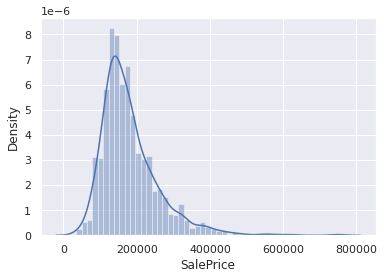

In [22]:
sns.distplot(df.SalePrice, label='Sale Price')
#sns.distplot(df.OverallQual, label='Overall Qual')

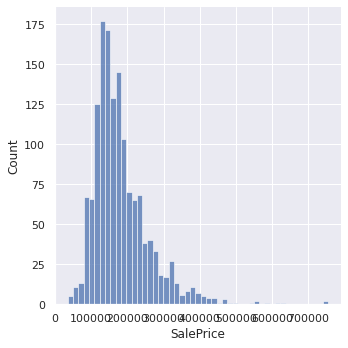

In [23]:
sns.displot(df.SalePrice, label='Sale Price')

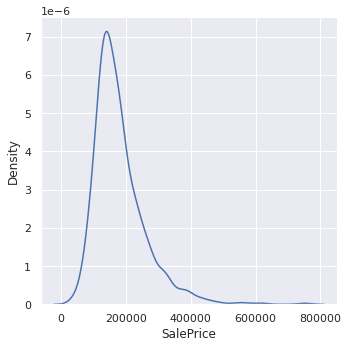

In [24]:
sns.displot(df.SalePrice, label='Sale Price', kind='kde')

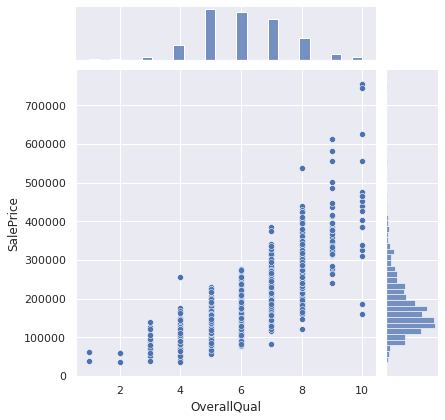

In [25]:
sns.set(color_codes=True)
sns.jointplot(x='OverallQual', y='SalePrice', data=df)

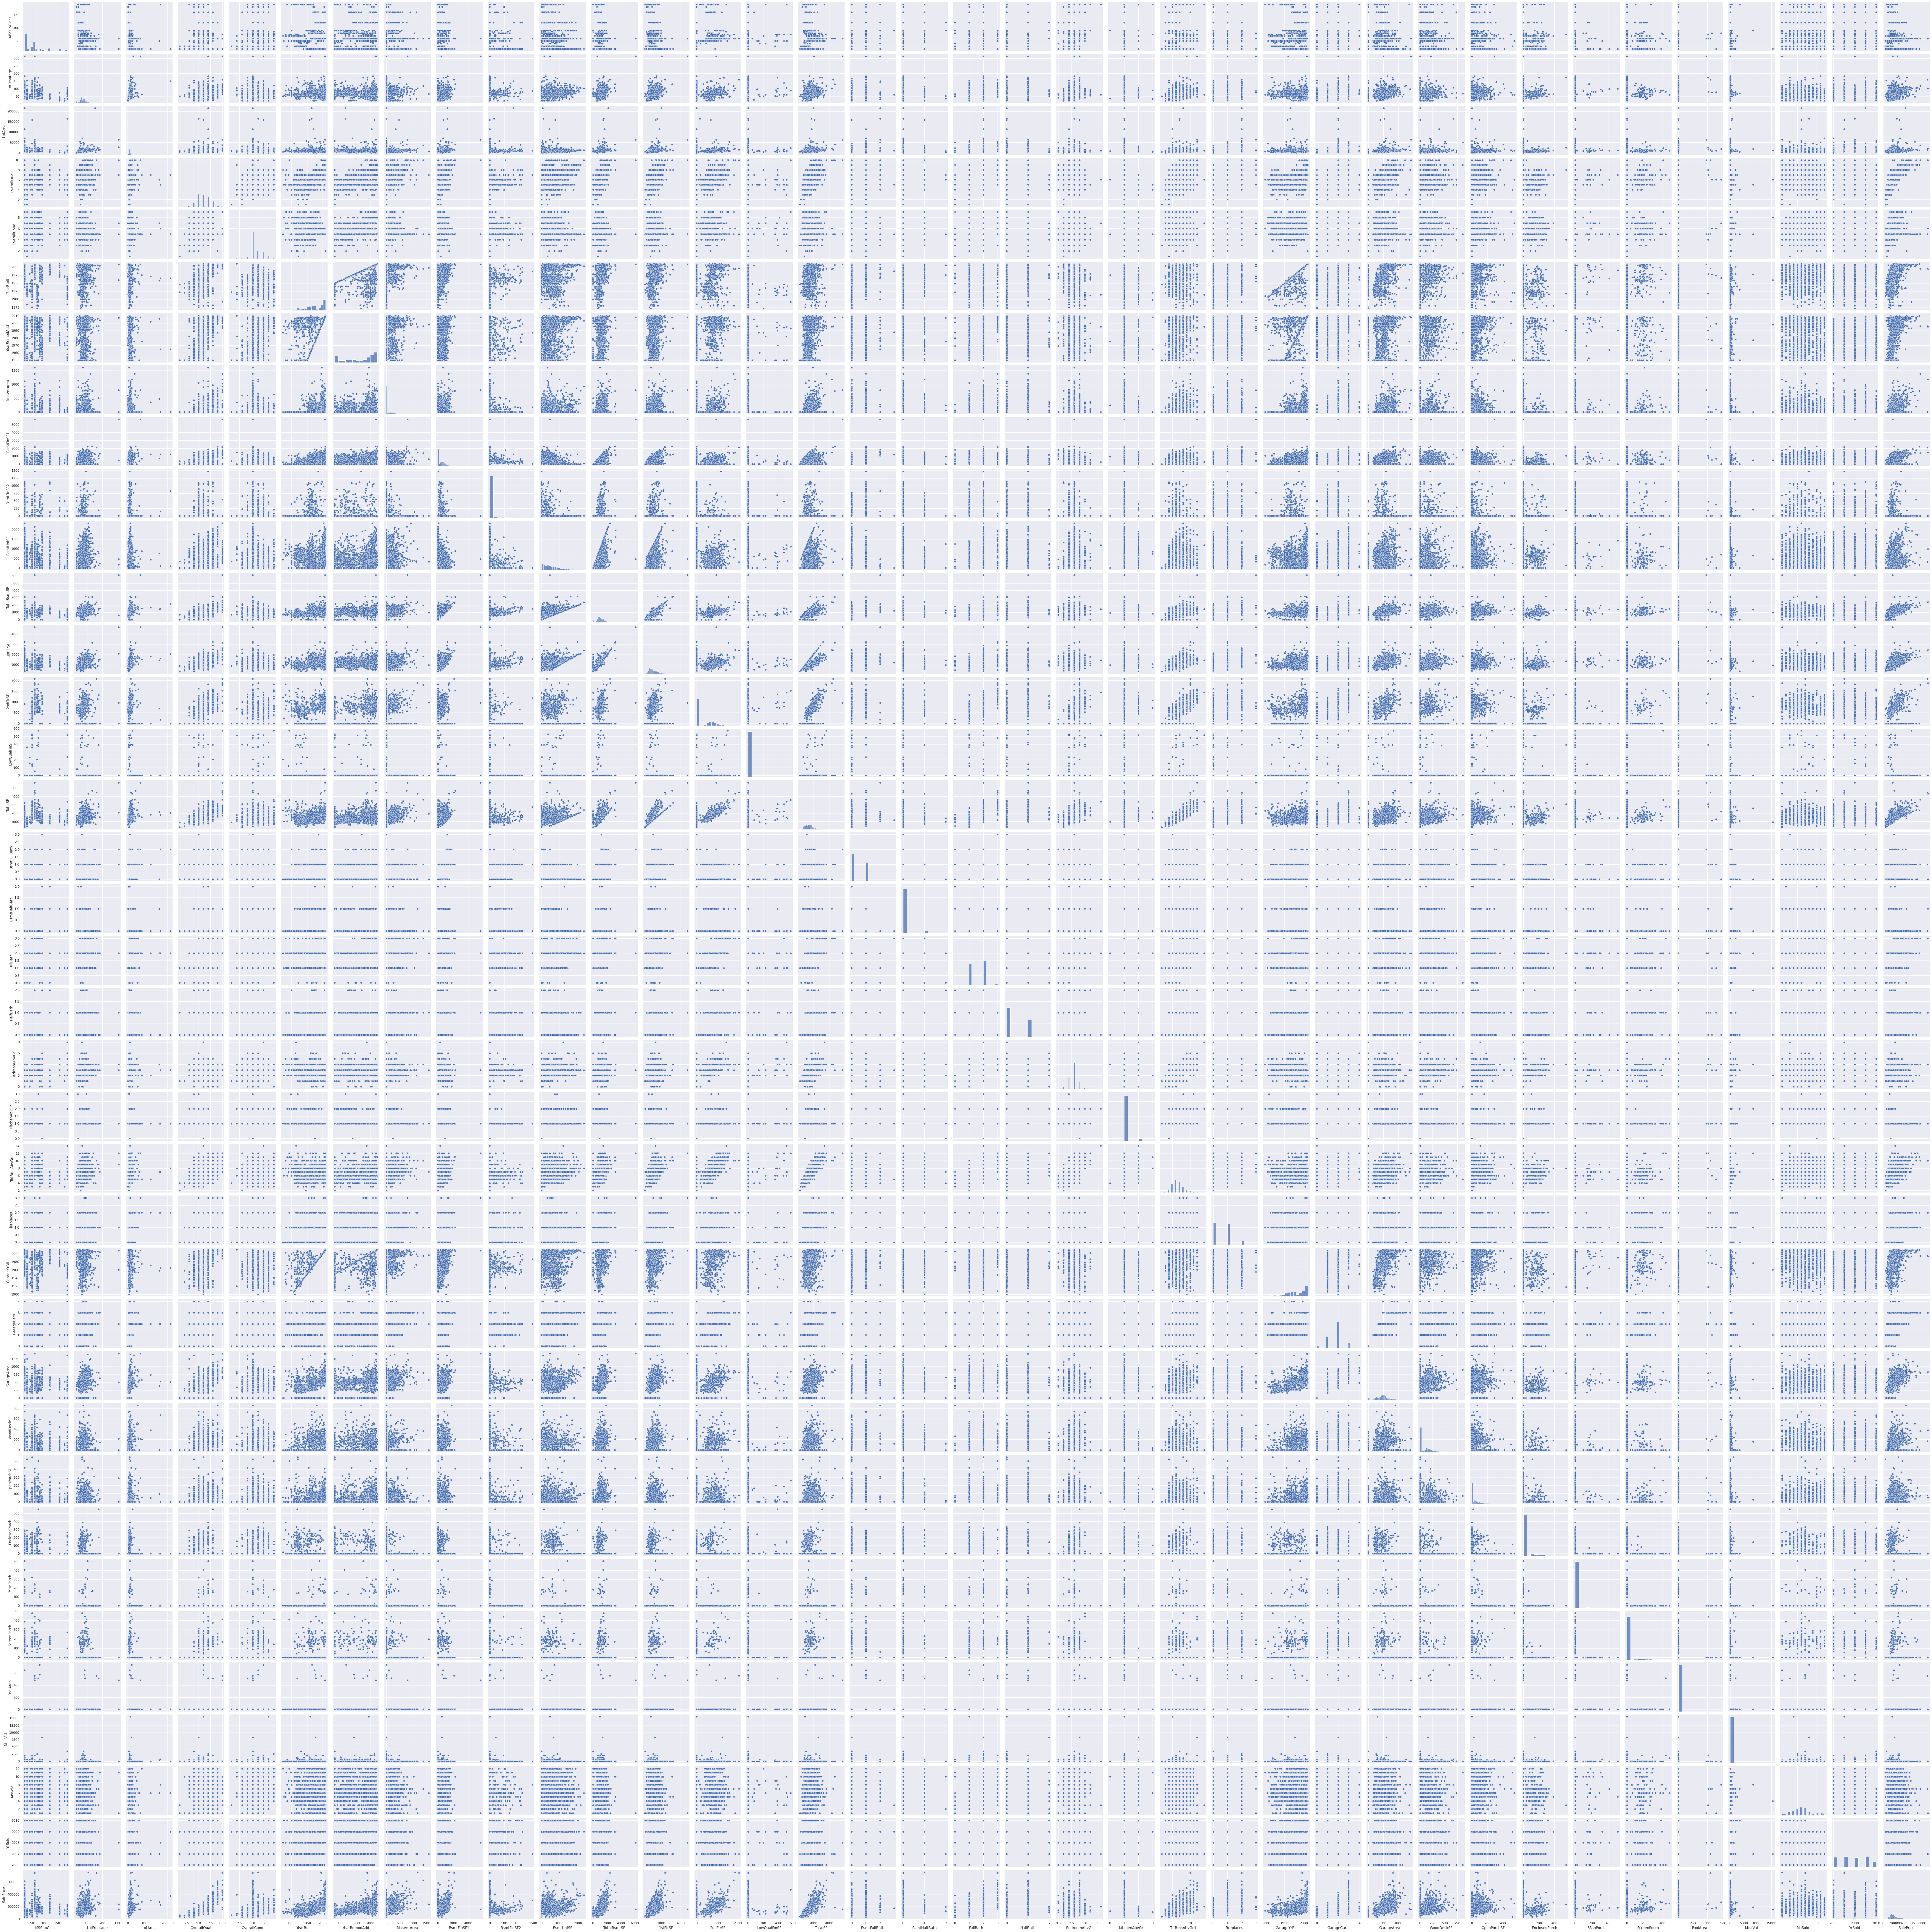

In [39]:
sns.pairplot(df)

In [84]:
from sklearn import preprocessing

label = 'SalePrice'

for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=False))
        
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... SaleType_ConLw SaleType_New  \
0         Lvl    AllPub    Inside  ...              0            0   
1         Lvl    AllPub       FR2  ...              0            0   
2         Lvl    AllPub    Inside  ...              0            0   
3         Lvl    AllPub    Corner  ...              0            0   
4         Lvl    AllPub       FR2  ...              0            0   

  SaleType_Oth SaleType_WD SaleCondition_Abnorml SaleCondition_AdjLand  \
0            0           1                     0                     0   
1            0           1                     0                     0   
2            0           1                     0                     0   
3            0           1                     1                     0   
4            0           1                     0                     0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 332 columns]

In [85]:
import numpy as np
import pandas as pd

x = df.select_dtypes(np.number)
x.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          2003       196.0         706           0  ...               0   
1          1976         0.0         978           0  ...               0   
2          2002       162.0         486           0  ...               0   
3          1970         0.0         216           0  ...               0   
4          2000       350.0         655           0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 289 columns]

In [86]:
df = df.select_dtypes(np.number)
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns=df.columns)
df_minmax

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
1       0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
2       0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
3       0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
4       0.235294     0.215753  0.060576     0.777778        0.500   0.927536   
...          ...          ...       ...          ...          ...        ...   
1455    0.235294     0.140411  0.030929     0.555556        0.500   0.920290   
1456    0.000000     0.219178  0.055505     0.555556        0.625   0.768116   
1457    0.294118     0.154110  0.036187     0.666667        1.000   0.500000   
1458    0.000000     0.160959  0.039342     0.444444        0.625   0.565217   
1459    0.000000     0.184932  0.040370     0.444444        0.625   0.673913   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0         0.883333    0.122500    0.125089    0.000000  ...             0.0   
1         0.433333    0.000000    0.173281    0.000000  ...             0.0   
2         0.866667    0.101250    0.086109    0.000000  ...             0.0   
3         0.333333    0.000000    0.038271    0.000000  ...             0.0   
4         0.833333    0.218750    0.116052    0.000000  ...             0.0   
...            ...         ...         ...         ...  ...             ...   
1455      0.833333    0.000000    0.000000    0.000000  ...             0.0   
1456      0.633333    0.074375    0.139972    0.110583  ...             0.0   
1457      0.933333    0.000000    0.048724    0.000000  ...             0.0   
1458      0.766667    0.000000    0.008682    0.698100  ...             0.0   
1459      0.250000    0.000000    0.147059    0.196744  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0              0.0           0.0          1.0                    0.0   
1              0.0           0.0          1.0                    0.0   
2              0.0           0.0          1.0                    0.0   
3              0.0           0.0          1.0                    1.0   
4              0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
1455           0.0           0.0          1.0                    0.0   
1456           0.0           0.0          1.0                    0.0   
1457           0.0           0.0          1.0                    0.0   
1458           0.0           0.0          1.0                    0.0   
1459           0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1455                    0.0                   0.0                   0.0   
1456                    0.0                   0.0                   0.0   
1457                    0.0                   0.0                   0.0   
1458                    0.0                   0.0                   0.0   
1459                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...               

In [87]:
y = df_minmax[label]
x = df_minmax.drop(columns=[label]).assign(const=1)
x.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
1    0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
2    0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
3    0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
4    0.235294     0.215753  0.060576     0.777778        0.500   0.927536   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_New  \
0      0.883333     0.12250    0.125089         0.0  ...           0.0   
1      0.433333     0.00000    0.173281         0.0  ...           0.0   
2      0.866667     0.10125    0.086109         0.0  ...           0.0   
3      0.333333     0.00000    0.038271         0.0  ...           0.0   
4      0.833333     0.21875    0.116052         0.0  ...           0.0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0           0.0          1.0                    0.0                    0.0   
1           0.0          1.0                    0.0                    0.0   
2           0.0          1.0                    0.0                    0.0   
3           0.0          1.0                    1.0                    0.0   
4           0.0          1.0                    0.0                    0.0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   1.0   

   SaleCondition_Partial  const  
0                    0.0      1  
1                    0.0      1  
2                    0.0      1  
3                    0.0      1  
4                    0.0      1  

[5 rows x 289 columns]

In [88]:
x.isnull().sum()

MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
OverallCond                0
                        ... 
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
const                      0
Length: 289, dtype: int64

In [89]:
x["LotFrontage"].dtype

dtype('float64')

In [90]:
x = x.drop(columns=['LotFrontage', 'GarageYrBlt'])
x.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    0.235294  0.033420     0.666667        0.500   0.949275      0.883333   
1    0.000000  0.038795     0.555556        0.875   0.753623      0.433333   
2    0.235294  0.046507     0.666667        0.500   0.934783      0.866667   
3    0.294118  0.038561     0.666667        0.500   0.311594      0.333333   
4    0.235294  0.060576     0.777778        0.500   0.927536      0.833333   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_New  \
0     0.12250    0.125089         0.0   0.064212  ...           0.0   
1     0.00000    0.173281         0.0   0.121575  ...           0.0   
2     0.10125    0.086109         0.0   0.185788  ...           0.0   
3     0.00000    0.038271         0.0   0.231164  ...           0.0   
4     0.21875    0.116052         0.0   0.209760  ...           0.0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0           0.0          1.0                    0.0                    0.0   
1           0.0          1.0                    0.0                    0.0   
2           0.0          1.0                    0.0                    0.0   
3           0.0          1.0                    1.0                    0.0   
4           0.0          1.0                    0.0                    0.0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   1.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   1.0   

   SaleCondition_Partial  const  
0                    0.0      1  
1                    0.0      1  
2                    0.0      1  
3                    0.0      1  
4                    0.0      1  

[5 rows x 287 columns]

In [91]:
x.isnull().sum()

MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
                        ..
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
const                    0
Length: 287, dtype: int64

In [92]:
y.values

array([0.24107763, 0.20358284, 0.26190807, ..., 0.321622  , 0.14890293,
       0.15636717])

In [93]:
x = x.dropna()

In [94]:
y = y.dropna()

In [95]:
y.shape

(1460,)

In [96]:
y = y.reset_index(drop=True) 
x = x.reset_index(drop=True)

In [97]:
y = y.values.reshape(-1,1)

In [98]:
y.shape

(1460, 1)

In [99]:
x.shape

(1452, 287)

In [100]:

y = pd.DataFrame(y, columns = ['Sale price'])

print(y)
print(type(y))

      Sale price
0       0.241078
1       0.203583
2       0.261908
3       0.145952
4       0.298709
...          ...
1455    0.194556
1456    0.243161
1457    0.321622
1458    0.148903
1459    0.156367

[1460 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [101]:
y.isnull().sum()


Sale price    0
dtype: int64

In [102]:
y.shape

(1460, 1)

In [103]:
x.shape

(1452, 287)

In [104]:
x.isnull().sum()

MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
                        ..
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
const                    0
Length: 287, dtype: int64

In [105]:
x.isna().sum()

MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
                        ..
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
const                    0
Length: 287, dtype: int64

In [106]:
#x.dropna()

In [107]:
y.dropna()

Sale price
0       0.241078
1       0.203583
2       0.261908
3       0.145952
4       0.298709
...          ...
1455    0.194556
1456    0.243161
1457    0.321622
1458    0.148903
1459    0.156367

[1460 rows x 1 columns]

In [108]:
y = y.iloc[8:,:]

In [109]:
y.shape

(1452, 1)

In [110]:
#x = x.iloc[8:,:]

In [111]:
x.shape

(1452, 287)

In [115]:
y = y.values.reshape(1,-1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [116]:
y.shape

(1452, 1)

In [117]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.082
Date:                Sun, 18 Dec 2022   Prob (F-statistic):              0.204
Time:                        20:20:45   Log-Likelihood:                 1286.5
No. Observations:                1452   AIC:                            -2071.
Df Residuals:                    1201   BIC:                            -745.6
Df Model:                         250                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               -0.0182      0.068     -0.266      0.790      -0.152       0.116
LotArea                   0.0647      0.112      0.576      0.564      -0.156       0.285
OverallQual               0.0331      0.044      0.746      0.456      -0.054       0.120
OverallCond               0.0361      0.034      1.072      0.284      -0.030       0.102
YearBuilt                 0.0990      0.051      1.960      0.050   -9.44e-05       0.198
YearRemodAdd             -0.0020      0.016     -0.126      0.900      -0.033       0.029
MasVnrArea                0.0316      0.045      0.700      0.484      -0.057       0.120
BsmtFinSF1                0.0314      0.075      0.421      0.674      -0.115       0.178
BsmtFinSF2               -0.0074      0.056     -0.132      0.895      -0.118       0.103
BsmtUnfSF                 0.0203      0.033      0.610      0.542      -0.045       0.086
TotalBsmtSF               0.0350      0.078      0.448      0.654      -0.118       0.188
1stFlrSF                  0.0963      0.074      1.298      0.195      -0.049       0.242
2ndFlrSF                  0.0147      0.052      0.283      0.778      -0.087       0.117
LowQualFinSF              0.1325      0.052      2.544      0.011       0.030       0.235
TotalSF                   0.0991      0.058      1.722      0.085      -0.014       0.212
BsmtFullBath              0.0473      0.029      1.642      0.101      -0.009       0.104
BsmtHalfBath              0.0551      0.029      1.875      0.061      -0.003       0.113
FullBath                 -0.0130      0.032     -0.405      0.686      -0.076       0.050
HalfBath                 -0.0093      0.020     -0.454      0.650      -0.049       0.031
BedroomAbvGr              0.0338      0.053      0.635      0.525      -0.071       0.138
KitchenAbvGr              0.0123      0.084      0.146      0.884      -0.152       0.177
TotRmsAbvGrd             -0.1237      0.056     -2.216      0.027      -0.233      -0.014
Fireplaces                0.0155      0.037      0.415      0.678      -0.058       0.089
GarageCars                0.0347      0.044      0.788      0.431      -0.052       0.121
GarageArea               -0.0510      0.053     -0.965      0.335      -0.155       0.053
WoodDeckSF               -0.0102      0.024     -0.419      0.675      -0.058       0.038
OpenPorchSF              -0.0312      0.031     -1.011      0.312      -0.092       0.029
EnclosedPorch             0.0249      0.033      0.742      0.458      -0.041       0.091
3SsnPorch                -0.0335      0.055     -0.609      0.543      -0.142       0.075
ScreenPorch               0.0113      0.029      0.387      0.699      -0.046       0.068
PoolArea                  0.3061      0.814      0.376      0.707      -1.291       1.903
MiscVal                